## <font color=red> Project - Diabetes Prediction

### Nir Chauser
### Rina Beloborodov

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as mpimg

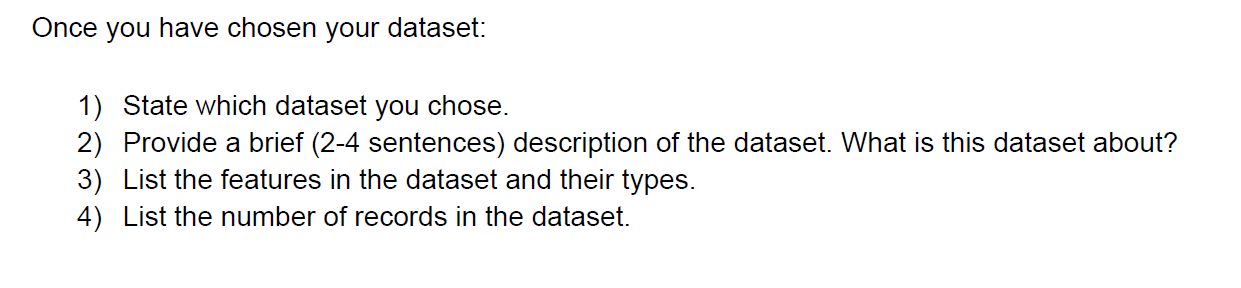

# Q1 + Q2

<div style="text-align: right" dir="rtl">
מסד הנתונים אותו בחרנו הוא על סוכרת.
סוכרת שאינה מבוקרת מביאה לעודף סוכר בדם, ועם הזמן היא עלולה לגרום לפגיעה ניכרת במערכות הגוף.
שיעורי התחלואה בעולם גדלים בהתמדה, והמחלה מהווה נטל כלכלי משמעותי על המשק. לפיכך חיזוי מראש וחקר המחלה יכול להוביל לתוצאות חיוביות הן על המשק והן על החולים העתידיים.
</div>

<div style="text-align: right" dir="rtl">
    המידע לקוח מהאתר:
    </div>

https://www.tasmc.org.il/Be-Well/InterestAreas/diabet/Pages/whatisdiabetes.aspx

In [9]:
df_0= pd.read_csv("diabetes_prediction_dataset.csv")
df_0
display(df_0)
display(df_0.describe())
display(df_0.describe(include=['O']))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


# Q3 + Q4

In [11]:
df_0.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<div style="text-align: right" dir="rtl">
 נשים לב שישנם משתנים שהטייפ שלהם הוא "אינט" או "פלוואט" אבל הם קטגוריאלים.      
</div>
<div style="text-align: right" dir="rtl">
    משתנים נומריים:
    age, bmi, HbA1c_level, blood_glucose_level.
    </div>
<div style="text-align: right" dir="rtl">
    משתנים קטגוריאלים:
    gender, hypertension, heart_disease, smoking_history, diabetes .
    </div>  
<div style="text-align: right" dir="rtl">
    יש 100,000 תצפיות בדאטה.
    </div>

# Feature Explanations:
- gender : מגדר
- age : גיל
- hypertension : יתר לחץ-דם
- heart_disease : קיום מחלת לב
- smoking_history : היסטוריית עישון
- bmi : bmi מדד
- HbA1c_level : סוג של המוגלובין
- blood_glucose_level : רמות סוכר בדם
- diabetes : קיום סוכרת

In [14]:
df_0.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
print("מחיקת כפילויות")
duplicate_rows = df_0[df_0.duplicated()]
duplicate_rows
df= df_0.drop_duplicates()
df

מחיקת כפילויות


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<div style="text-align: right" dir="rtl">
    לאחר מחיקת הכפילויות, יש 96,146 תצפיות.
    </div>

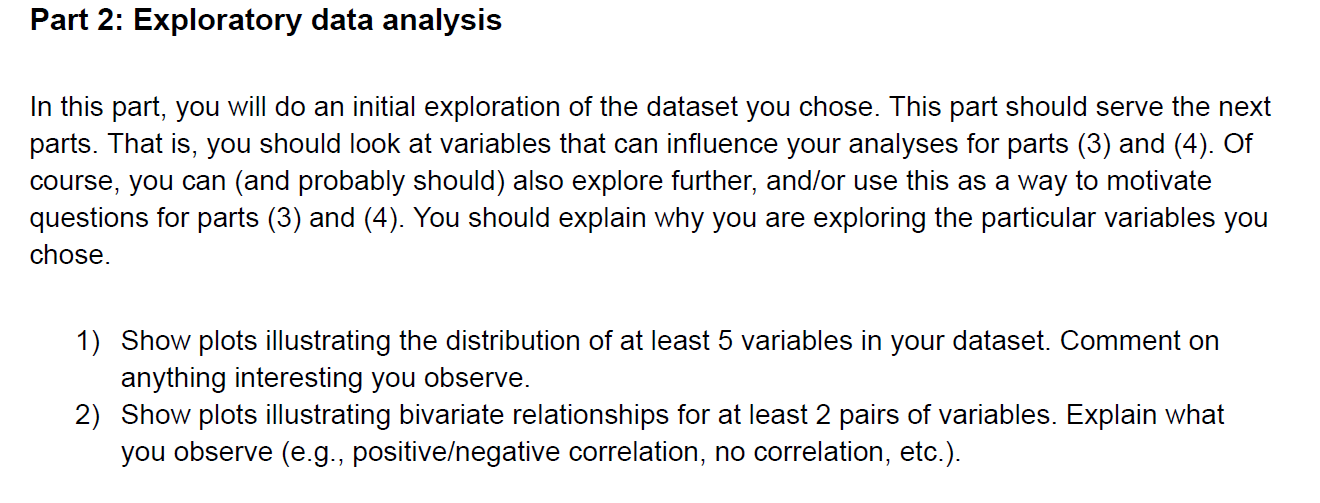

# Q1

<center> 
    <div class="alert alert-block alert-info">
<b>תרשימי עמודות עבור התפלגות משתנים קטגוריאליים</b> </div>
</center>

Text(0.5, 0.98, 'Distribution of smoking history ')

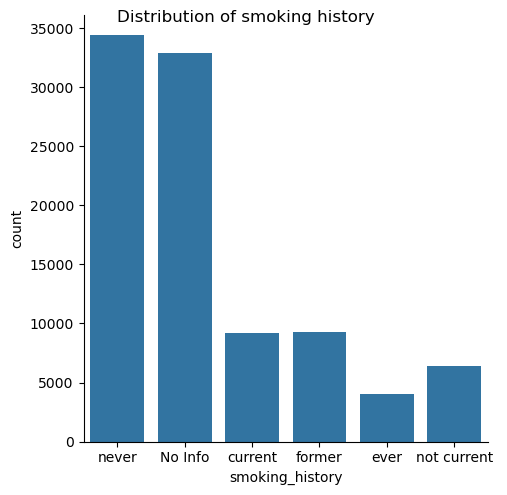

In [20]:
facetgrid_obj=sns.catplot(x='smoking_history',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of smoking history ') 

Text(0.5, 0.98, 'Distribution of heart disease ')

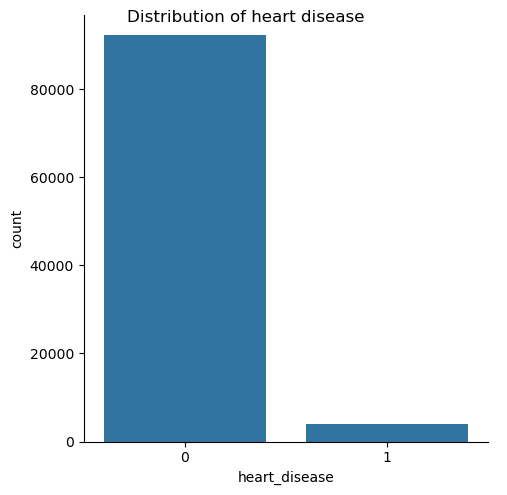

In [21]:
facetgrid_obj=sns.catplot(x='heart_disease',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of heart disease ') 

Text(0.5, 0.98, 'Distribution of hypertension ')

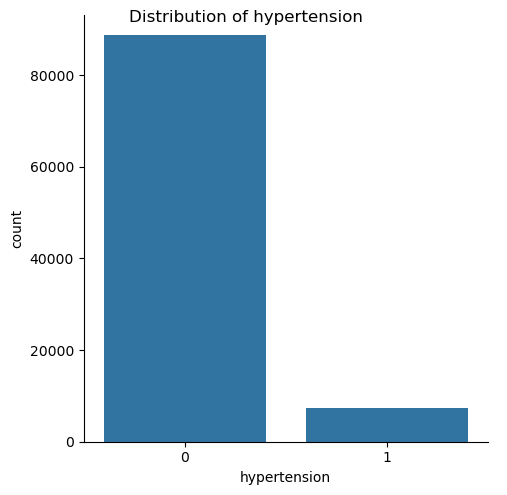

In [22]:
facetgrid_obj=sns.catplot(x='hypertension',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of hypertension ') 

Text(0.5, 0.98, 'Distribution of gender ')

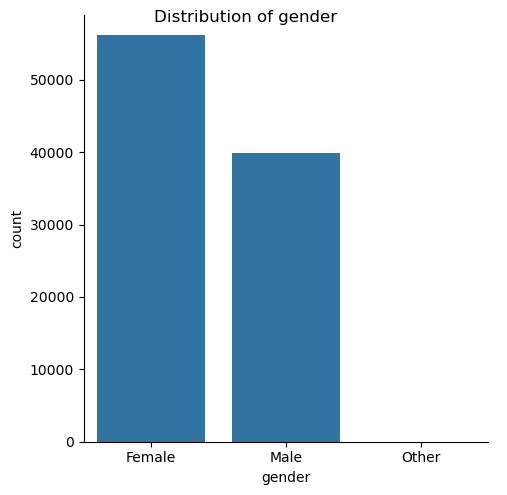

In [23]:
facetgrid_obj=sns.catplot(x='gender',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of gender ') 

<div style="text-align: left" dir="rtl">
ראינו שהתקבלה עמודה נוספת ורוצים לוודא את כמות ה"אחרים".
</div>

In [25]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

.כמות האחרים זניחה 

<center> 
    <div class="alert alert-block alert-info">
<b>תרשימי עמודות עבור התפלגות משתנים נומריים</b> </div>
</center>

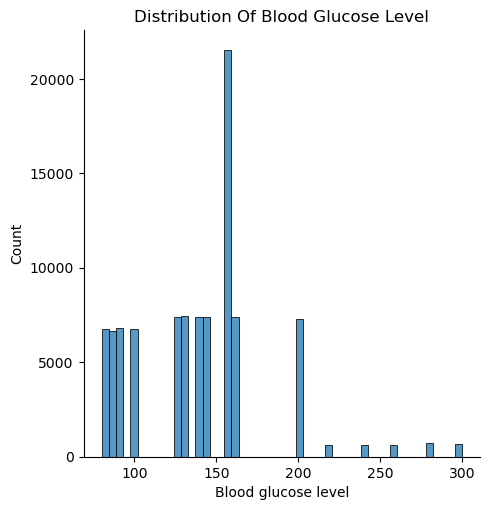

In [28]:
ax = sns.displot(data = df, x = 'blood_glucose_level',bins = 50)
ax.set(xlabel="Blood glucose level", title='Distribution Of Blood Glucose Level')
plt.show()

<div style="text-align: right" dir="rtl">
טווח ערכים של רמת גלוקוז תקינה נע בין 72 ל100 בזמנים בהם לא אוכלים. כאשר נמצאים עד שעתיים אחרי ארוחה הרמה יכולה להגיע ל140. לפי המידע הנ"ל ניתן להניח שבדיקת הדם נעשה כשעתיים לאחר ארוחה שכן, מרבית הנבדקים נמצאים סביב 140 שהיא הנורמה לאחר שעתיים מהאכילה.
</div>


<div style="text-align: right" dir="rtl">
    המידע לקוח מהאתר:
</div>

https://www.oleniklaw.co.il/%D7%A8%D7%9E%D7%AA-%D7%A1%D7%95%D7%9B%D7%A8-%D7%AA%D7%A7%D7%99%D7%A0%D7%94/

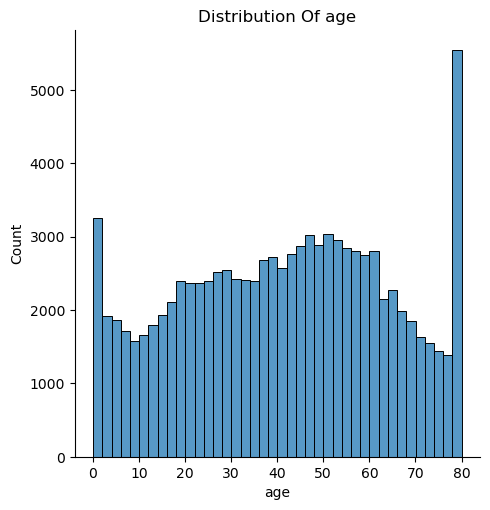

In [32]:
ax = sns.displot(data = df, x = 'age',bins = 40)
ax.set(xlabel="age", title='Distribution Of age')
plt.show()

<div style="text-align: left" dir="rtl">
ניתן לראות שקבוצת הגיל 78-80 היא קבוצת הגיל הגדולה ביותר.
</div>

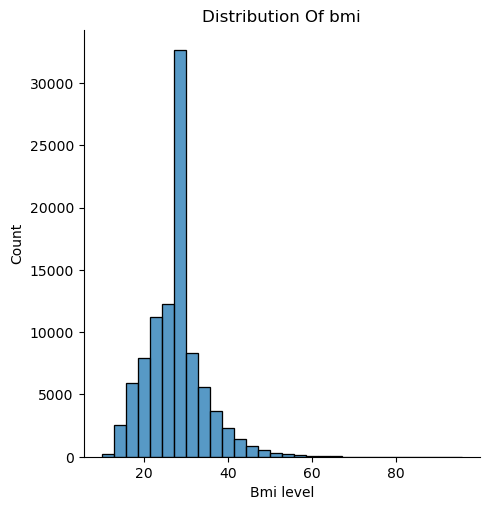

In [34]:
ax = sns.displot(data = df, x = 'bmi',bins = 30)
ax.set(xlabel="Bmi level", title='Distribution Of bmi')
plt.show()

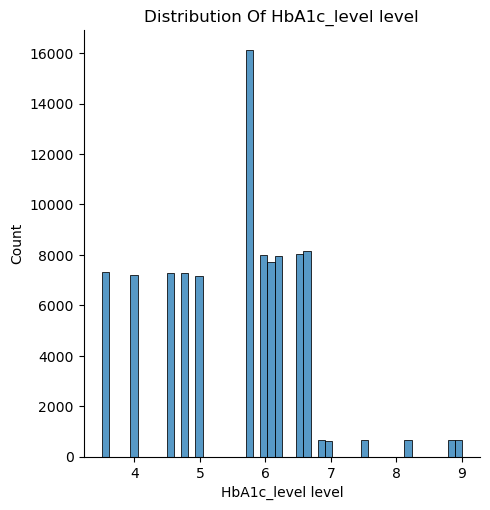

In [35]:
ax = sns.displot(data = df, x = 'HbA1c_level',bins = 50)
ax.set(xlabel="HbA1c_level level", title='Distribution Of HbA1c_level level')
plt.show()

<div style="text-align: right" dir="rtl">
    תרשים זה מייצג את התפלגות רמות החלבון המוגלובין A1C. ערך תקין של חלבון זה הינו פחות מ5.7%. והחל מ6.7% האדם מוגדר כחולה סוכרת. בגרף ניתן לראות שמרבית האנשים במצב של טרום סוכרת.
    </div>

# Q2

<center> 
    <div class="alert alert-block alert-info">
<b>תרשימי קשרים בין משתנים</b> </div>
</center>

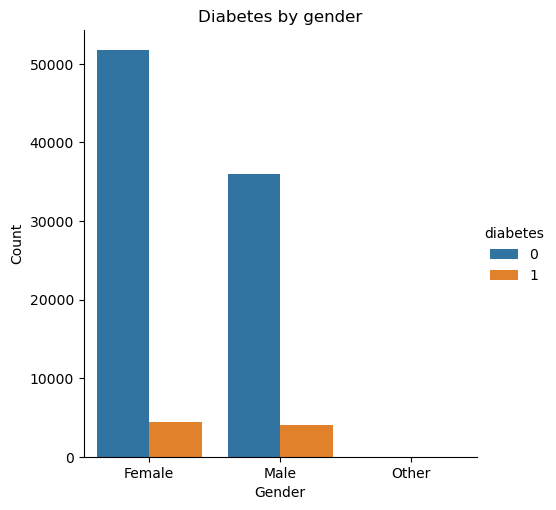

In [39]:
ax = sns.catplot(kind='count', x='gender',hue='diabetes',data=df)
ax.set(xlabel='Gender', ylabel='Count', title='Diabetes by gender');

<div style="text-align: left" dir="rtl">
ניתן לראות שלא קיים קשר בין מין הנבדק לבין הימצאותו כחולה בסוכרת.
</div>


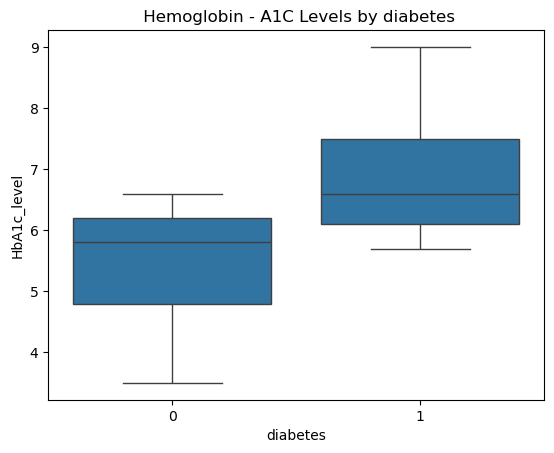

In [41]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title(" Hemoglobin - A1C Levels by diabetes")
plt.show()

<div style="text-align: left" dir="rtl">
    ניתן לראות שיש קשר בין קיום סוכרת לרמות גבוהות של המוגלובין A1C בדם.
    </div>

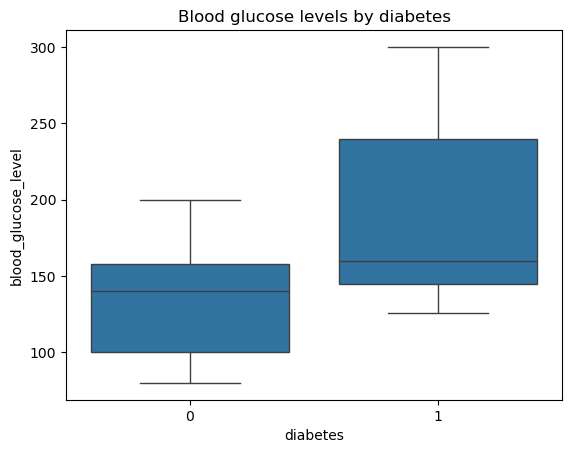

In [43]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title("Blood glucose levels by diabetes")
plt.show()

<div style="text-align: left" dir="rtl">
    ניתן לראות שיש קשר בין קיום סוכרת לרמות גבוהות של הגלוקוז בדם.
    </div>

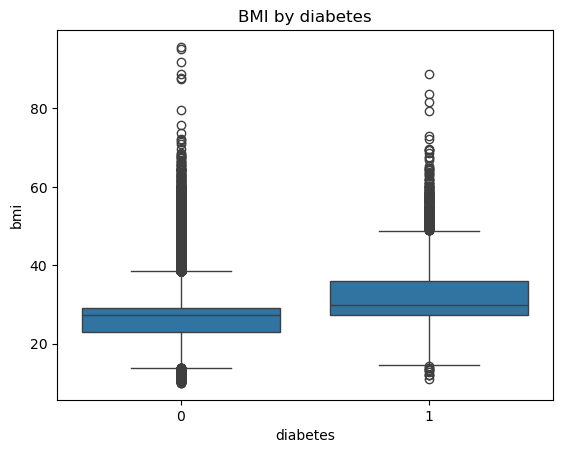

In [45]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title("BMI by diabetes")
plt.show()

<div style="text-align: left" dir="rtl">
    ניתן לראות שיש קשר בין קיום סוכרת לרמות גבוהות של מדד ה bmi.
    </div>

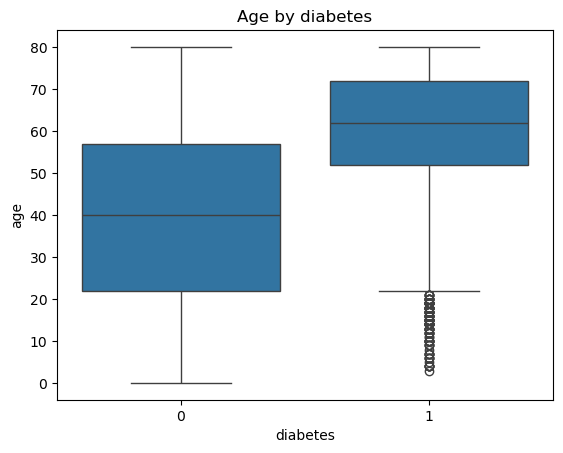

In [47]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title("Age by diabetes")
plt.show()

<div style="text-align: left" dir="rtl">
    ניתן לראות שיש קשר בין קיום סוכרת לגיל מבוגר יותר.
    </div>

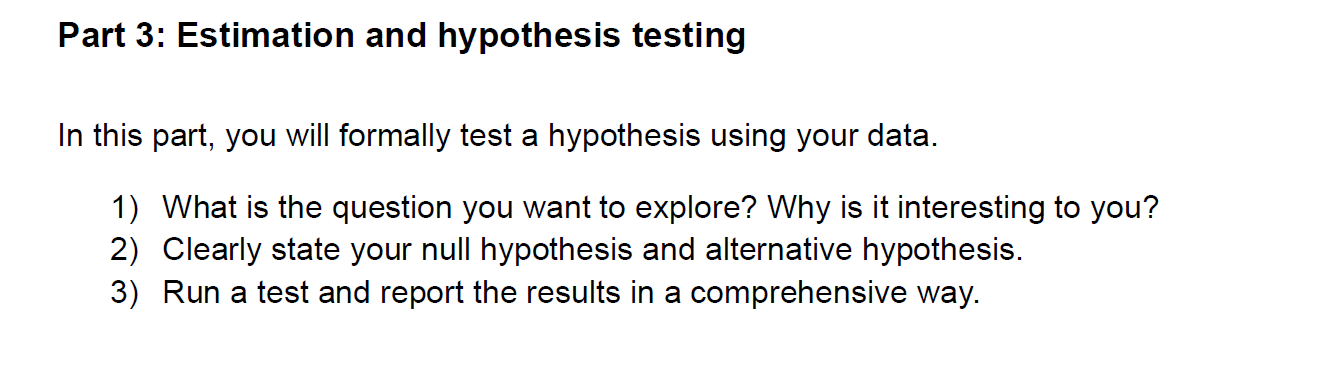

# Q1

<div style="text-align: right" dir="rtl">
האם יש הבדל בתחלואת הסוכרת בין לגברים לנשים?
</div>

<div style="text-align: right" dir="rtl">
    לפי הגרף של סכרת לפי מין אנו רואים שאין הבדל מובהק בין כמות הגברים והנשים החולים בסוכרת.
רצינו לבדוק האם דבר זה נכון גם לכלל האוכלוסייה ולא רק במדגם הנתון.
</div>

# Q2

<div style="text-align: right" dir="rtl">
H0: אין הבדל בין שיעור התחלואה של גברים בסוכרת לעומת שיעור התחלואה של נשים באוכלוסייה.
</div>

<div style="text-align: right" dir="rtl">
H1 : יש הבדל בין שיעור התחלואה של גברים בסוכרת לעומת שיעור התחלואה של נשים באוכלוסייה.
</div>

<div style="text-align: right" dir="rtl">
    סטטיסטי: הפרש הממוצעים בין שיעור תחלואת הגברים לשיעור תחלואת הנשים.
    </div>

# Q3

In [58]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

<div style="text-align: right" dir="rtl">
בנתונים שלנו ישנה קטגוריה של "אחר". בניתוח ההשערות לא נתייחס אליה משום שאנו בודקים את ההבדל בין גברים לנשים וקטגוריית ה"אחר" אינה מוגדרת במפורש.
</div>

In [60]:
def diff_of_avgs(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['Male'] - avgs.loc['Female']  

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [ ]:
# bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(df, 'diabetes', 'gender', 5000)# 5000 simulations 

# the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 97.5, interpolation='higher')
print('The 95% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);  
ax.set(xlabel='Difference between rate of diabetes between men and women', ylabel='frequency',
       title='Distribution of bootstrap estimates for the difference between diabetes rate of men and women');

plt.scatter(0, 0, color='red', s=120, clip_on=False)

<div style="text-align: right" dir="rtl">
    יצרנו התפלגות בעזרת 5,000 סימולציות על הפרשי שיעורי תחלואת הסכרת בין גברים לנשים. יצרנו רווח סמך ברמת בטחון של 95% והאפס לא נכלל בתוך רווח הסמך.
    כלומר, ברמת בטחון של 95% (ובכל רמת בטחון אחרת, כי אפס לא נמצא בכלל בהתפלגות) ניתן לדחות את השערת האפס.
ולפי מדגם זה שאליו נתיחס כמדגם מייצג נקבל שלגברים שיעור התחלואה גבוה יותר מאשר לנשים.
    </div>

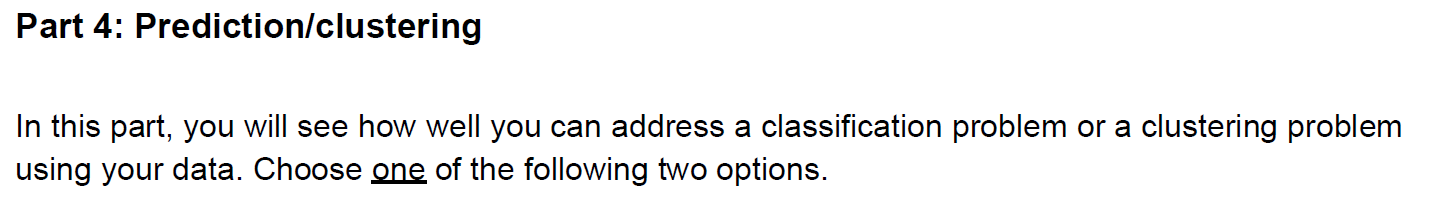

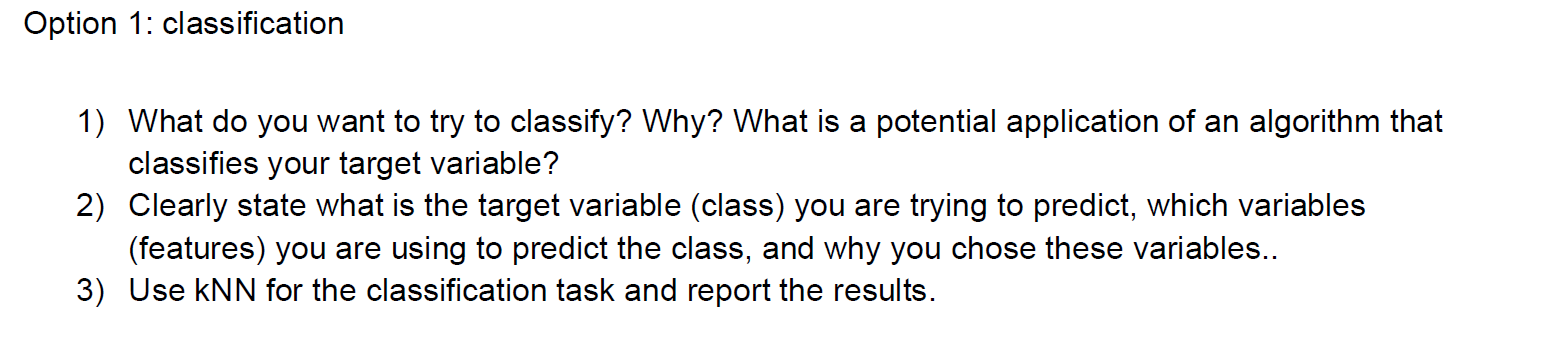

# Q1

<div style="text-align: right" dir="rtl">
    אנחנו רוצים ליצור מסווג אשר יעזור לנו לחזות האם אדם יחלה בסוכרת על סמך תכונות כמו: מחלות לב, יתר לחץ דם, גיל, מין וכ"ו. ונבדוק אחר כך אילו תכונות הן בעלות קורלציה גבוהה עם המטרה שהיא מחלת הסוכרת. האלגוריתם ימליץ לאדם להיבדק לסוכרת. כדי שנדע על סמך אילו נתונים להתבסס נבדוק את הקורלציה ביניהם לתחלואה בסוכרת. 
    </div>

# Q2

<div style="text-align: right" dir="rtl">
המטרה היא האם אדם חולה או לא.
כאשר 1 זה אדם חולה ו0 אדם שהוא לא חולה.
את הפיצ'רים נבחר באמצעות התבוננות בהיטמאפ.
</div>

# Q3

In [ ]:
encoded_df = pd.get_dummies(df, columns=['gender'], drop_first=True)
#הופכים את המין למשתנה נומרי
encoded_df.sample(10)

<div style="text-align: right" dir="rtl">
<b>
    הערה:  
    </b>
    לא התייחסנו לקטגוריית העישון (ולכן לא הפכנו אותה למשתנה נומרי) כי אנחנו לא יודעים איך מי שלקח את הדגימות סיווג את מדדי העישון לקטגוריות. יכול להיות שבאותה קטגוריה יש אנשים שנחשפו לעישון בפרק זמן ממושך יותר ובכמות רבה יותר. למשל: אדם שעישן בעבר היה יכול לעשן סיגריה אחת ביום, חבילה ביום או מצית ביום.
    בנוסף, גם אדם שלא מעשן סיגריות יכול להיחשף לנזקי עישון אם הוא נמצא בקרבת מעשנים. כלומר, מעשן פסיבי.
    </div>

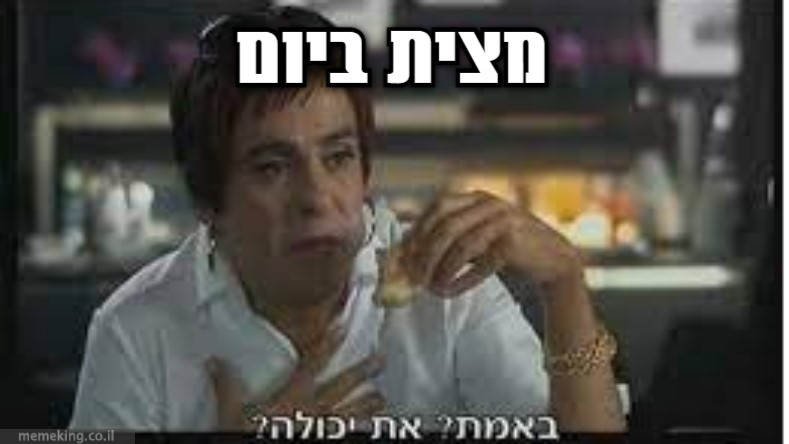

In [ ]:
# compute correlation between each pair of variables in data frame
correlations = encoded_df.corr(numeric_only=True)

#plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(correlations,annot=True, cmap="seismic")

In [ ]:
correlations.reindex(correlations["diabetes"].abs().sort_values().index)["diabetes"] # ordered by absolute value

<div style="text-align: right" dir="rtl">
    הפיצ'רים: 
blood_glucose_level, HbA1c_level
     , נמצאים בקורלציה הגבוהה ביותר עם תחלואת הסוכרת.   
    </div>

In [ ]:
 #we need to split our data to train and test sets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Let's keep only the variables we're interested in
knn_df = encoded_df[['HbA1c_level', 'blood_glucose_level', 'diabetes']]
knn_df = knn_df.sample(frac=1)
knn_df

In [ ]:
# Split to X and Y
X = knn_df.loc[:, knn_df.columns != 'diabetes'] # features
Y = knn_df.loc[:, 'diabetes'].values # labels

# Split to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train 
X_test
display(X_test, X_train, Y_test,Y_train)

In [ ]:
# We need to scale the variables to be on the same scale
# We choose here to standardize using z-scores.
df_columns = X_train.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_df = pd.DataFrame(scaled_X_train, columns=df_columns)
scaled_df.describe()

<div style="text-align: right" dir="rtl">
    המדד החשוב עבור המסווג שלנו הוא 
    Accuracy 
    חשוב לנו למצוא אנשים שהם חולים בסוכרת ולסווג אותם נכון. כמו כן סיווג של אדם שאינו חולה בסוכרת כאחד שכן חולה עלול להביא לנטילת תרופות המגבירות אינסולין ולבסוף גם לפגוע בו.לפיכך הדיוק חשוב במקרה זה. 
    </div>

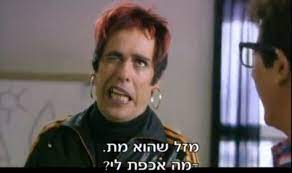

In [ ]:
# Run CV to find optimal k - using only the training data
from sklearn.model_selection import cross_val_score

mean_cv_scores = []
k_list = range(1, 25)
for nn in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=nn)
    cv_scores = cross_val_score(knn_cv, scaled_X_train, Y_train, cv=10)
    mean_cv_scores.append(cv_scores.mean())
    
# output results
best_k = mean_cv_scores.index(max(mean_cv_scores))+1 # gets index of best performing k and adds 1
print('Highest accuracy is obtained for k =', best_k, 'and equals', max(mean_cv_scores))
plt.plot(k_list, mean_cv_scores, '-o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy');


In [ ]:
# Retrain our chosen kNN on the whole training data and test its accuracy on the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(scaled_X_train, Y_train)
print('accuracy of the classifier is', knn_classifier.score(scaled_X_test, Y_test))

# Compute a confusion matrix
predictions = knn_classifier.predict(X=scaled_X_test) # get the classifier's predictions 

.המסווג שיצרנו מוצלח משום שמדד הדיוק שלו גבוה

<center> 
    <div class="alert alert-block alert-info">
<b>:חקר נוסף</b> </div>
</center>

<div style="text-align: right" dir="rtl">
    נרצה לבדוק קשר בין גיל ומגדר לסיכוי לתחלואה במחלת לב.
    </div>

In [ ]:
# Analyze the connection between age, gender, and heart disease
age_gender_heart = df.groupby(['age', 'gender'])['heart_disease'].mean().reset_index()

# Visualize the connection
plt.figure(figsize=(12, 6))
sns.scatterplot(data=age_gender_heart, x='age', y='heart_disease', hue='gender', palette='coolwarm')
plt.title('Connection Between Age, Gender, and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease Rate')
plt.legend(title='Gender')
plt.show()

<div style="text-align: right" dir="rtl">
    ניתן לראות שהסיכוי לחלות במחלות לב בקרב גברים מתחיל מוקדם יותר מאשר אצל נשים והסיכון גבוה יותר.
    </div>

<div style="text-align: right" dir="rtl">
    נרצה ליצור מסווג שיגיד אם אדם הוא בקבוצת סיכון למחלות לב.
    </div>

In [ ]:
df_old = df.loc[df['age'] >= 40]

In [ ]:
# Functions to apply the condition and create new columns:
def apply_condition(row):
    if row['gender'] == 'Male' and row['age'] > 40 and row['heart_disease'] == 1:
        return 1
    else:
        return 0

# Apply the function to create new columns
df_old['A man in a risk group'] = df_old.apply(apply_condition, axis=1)

def apply_condition(row):
    if row['gender'] == 'Female' and row['age'] > 50 and row['heart_disease'] == 1:
        return 1
    else:
        return 0

# Apply the custom function to create new columns
df_old['A woman in a risk group'] = df_old.apply(apply_condition, axis=1)
df_old

In [ ]:
#דאטה פריים נפרד עבור נשים
women_df = df_old[df_old['gender'] == 'Female']
fulfill_condition = women_df['A woman in a risk group'].sum() #כמה נמצאות בקבוצת סיכון
do_not_fulfill_condition = len(women_df) - fulfill_condition
print("Number of women in danger group:", fulfill_condition)
print("Number of women not in danger group:", do_not_fulfill_condition)
facetgrid_obj=sns.catplot(x='diabetes',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of diabetes among women in danger group ') 

In [ ]:
#דאטה פריים נפרד עבור גברים
men_df = df_old[df_old['gender'] == 'Male']
fulfill_condition = men_df['A man in a risk group'].sum() #כמה נמצאים בקבוצת סיכון
do_not_fulfill_condition = len(men_df) - fulfill_condition
print("Number of men in danger group:", fulfill_condition)
print("Number of men not in danger group:", do_not_fulfill_condition)
facetgrid_obj=sns.catplot(x='diabetes',kind='count',data=df)
facetgrid_obj.fig.suptitle('Distribution of diabetes among men in danger group ') 

<div style="text-align: right" dir="rtl">
    לא נוכל ליצור מסווג בעזרת הדאטה שיש לנו בגלל חוסר פרופורציה בין כמות האנשים בכל מין שהם בקבוצת סיכון לבין אלו שלא.
    </div>

<div style="text-align: right" dir="rtl">
    נרצה לחקור סכנה לסכרת הריון בגיל מבוגר.
    </div>

In [ ]:
# יוצרים דאטה פריים עבור נשים בגילאי 35 עד 45.
women_between_35_45 = df[(df['gender'] == 'Female') & (df['age'] >= 35) & (df['age'] <= 45)]
print("Number of women between ages 35 and 45:", len(women_between_35_45))

In [ ]:
women_between_35_45

In [ ]:
facetgrid_obj=sns.catplot(x='diabetes',kind='count',data=women_between_35_45)
facetgrid_obj.fig.suptitle('Distribution of diabetes among women aged 35 to 45 ') 
women_between_35_45['diabetes'].value_counts()

<div style="text-align: right" dir="rtl">
    לא נוכל ליצור מסווג בעזרת הדאטה שיש לנו בגלל חוסר פרופורציה בין כמות הנשים בגילאי 35-45 שחולות בסוכרת וכאלה שלא חולות בסוכרת.
    </div>